# Figure 2 - Ice Velocity (ITS_LIVE) and Ice Discharge (Mankoff et al., 2020)

In [2]:
# IMPORT MODULES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [3]:
# DEFINE THE ITS_LIVE VELOCITY DATA VARIABLES.
ITS_LIVE_data = pd.read_csv(r'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/its_live_sampled_6_12_day.csv')
POINT1_VELOCITY = ITS_LIVE_data['POINT_1_VELOCITY']
POINT2_VELOCITY = ITS_LIVE_data['POINT_2_VELOCITY']
POINT3_VELOCITY = ITS_LIVE_data['POINT_3_VELOCITY']
POINT4_VELOCITY = ITS_LIVE_data['POINT_4_VELOCITY']
POINT5_VELOCITY = ITS_LIVE_data['POINT_5_VELOCITY']
POINT6_VELOCITY = ITS_LIVE_data['POINT_6_VELOCITY']
POINT7_VELOCITY = ITS_LIVE_data['POINT_7_VELOCITY']
ITS_LIVE_data['mid_date'] = pd.to_datetime(ITS_LIVE_data['mid_date'], format='%Y/%m/%d')

In [5]:
# DEFINE THE ICE DISCHARGE VARIABLES. 
discharge_file = 'R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_discharge_mankoff_2020/jakobshavn_g184_discharge_2018_2023.csv'
df = pd.read_csv(discharge_file)
discharge = df['discharge']
error = df['error']
coverage = df['coverage']
date = pd.to_datetime(df['date'], format='%Y/%m/%d')
mask = coverage > 0.5

In [44]:
# PROVIDE THE Y AND X AXIS TITLES 
ytitle_discharge = 'Ice Discharge (Gt/yr)'
ytitle_velocity = 'Ice Velocity (km/yr)'
xtitle = 'Date'

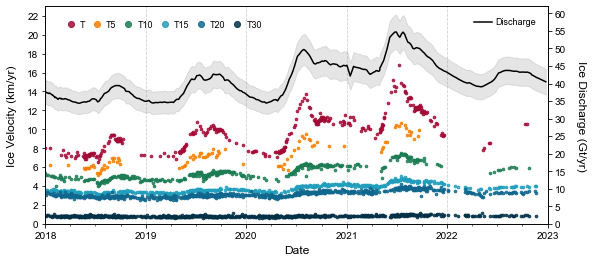

In [115]:
plt.rcParams["font.family"] = "Arial"
fig, ax1 = plt.subplots(figsize=(9, 4))
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
ax1.set_xlabel(xtitle, labelpad=5, fontsize=12)

# PLOT A SCATTER PLOT FOR ICE VELOCITY AT EACH SAMPLED POINT
ax1.scatter(ITS_LIVE_data['mid_date'], POINT1_VELOCITY/1000, color='#a30b37', s=7, marker='o', alpha=0.85, label='T', zorder=20)
ax1.scatter(ITS_LIVE_data['mid_date'], POINT2_VELOCITY/1000, color='#f77f00', s=7, marker='o', alpha=0.85, label='T5', zorder=20)
ax1.scatter(ITS_LIVE_data['mid_date'], POINT3_VELOCITY/1000, color='#1c7c54', s=7, marker='o', alpha=0.85, label='T10', zorder=20)
ax1.scatter(ITS_LIVE_data['mid_date'], POINT4_VELOCITY/1000, color='#219ebc', s=7, marker='o', alpha=0.85, label='T15', zorder=20)
ax1.scatter(ITS_LIVE_data['mid_date'], POINT5_VELOCITY/1000, color='#10678e', s=7, marker='o', alpha=0.85, label='T20', zorder=20)
ax1.scatter(ITS_LIVE_data['mid_date'], POINT7_VELOCITY/1000, color='#023047', s=7, marker='o', alpha=0.85, label='T30', zorder=20)

# SET THE Y AXIS TICK LIMITS AND TITLE FOR ICE VELOCITY 
ax1.set_ylim(0, 23)
ax1.set_yticks(np.arange(0, 22+1, 2))
ax1.set_ylabel(ytitle_velocity, labelpad=10, fontsize=12)

# PLOT A LINE GRAPH FOR ICE DISCHARGE WITH UNCERTAINTY SHOWN
ax2 = ax1.twinx()
ax2.plot(date, discharge, 'black', label='Discharge')
ax2.fill_between(date, discharge - error, discharge + error, alpha=0.2, color='gray')

# SET THE Y AXIS TICK LIMITS AND TITLE FOR ICE DISCHARGE 
ax2.set_ylim(0, 62)
ax2.set_yticks(np.arange(0, 62+1, 5))
ax2.set_ylabel(ytitle_discharge, labelpad=10, rotation=-90, verticalalignment='bottom', fontsize=12)

# SET THE X AXIS TICK LIMITS TO RANGE BETWEEN 2018/01/01 AND 2023/01/01
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax1.xaxis.set_minor_locator(three_month_intervals)

# ADD A LEGEND FOR THE ICE VELOCITY MARKERS
lines1, labels1 = ax1.get_legend_handles_labels()
legend = ax1.legend(lines1, labels1, loc='upper left', ncol=6, columnspacing=0.3, markerscale=2.3, frameon=False, framealpha=1, handletextpad=0.01, handleheight=0.1, fontsize =9, facecolor='white', borderaxespad = 0.8, borderpad=0.45, fancybox=False, bbox_to_anchor=(0.01, 1))
legend.set_zorder(20)
for text in legend.get_texts():
    text.set_va('center')

# ADD A LEGEND FOR THE ICE DISCHARGE LINE 
lines2, labels2 = ax2.get_legend_handles_labels()
legend2 = ax2.legend(lines2, labels2, loc='upper right', frameon=False, framealpha=1, handletextpad=0.4, handleheight=0.1, fontsize =9, facecolor='white', borderaxespad = 0.8, borderpad=0.45, fancybox=False)
legend2.set_zorder(20)
for line in legend2.get_lines():
    line.set_markersize(2)

#plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_2.png', dpi=300)